In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
from IPython.display import clear_output
import torchsummary
import torch

import sys
sys.path.append('../..')

from vae import compute_fid_score
from gan import GAN
from rbm import RBM
from dbn import DBN
from load_data import load_mnist

# Load data

In [2]:
X_train, y_train, X_test, y_test = load_mnist(binarize=False)

# GAN

In [3]:
gan_model = GAN(latent_dim=50)

In [ ]:
gan_model.train(X_train, epochs=100, learning_rate=3e-4, n_iters_inner=2, beta_1=0.5)

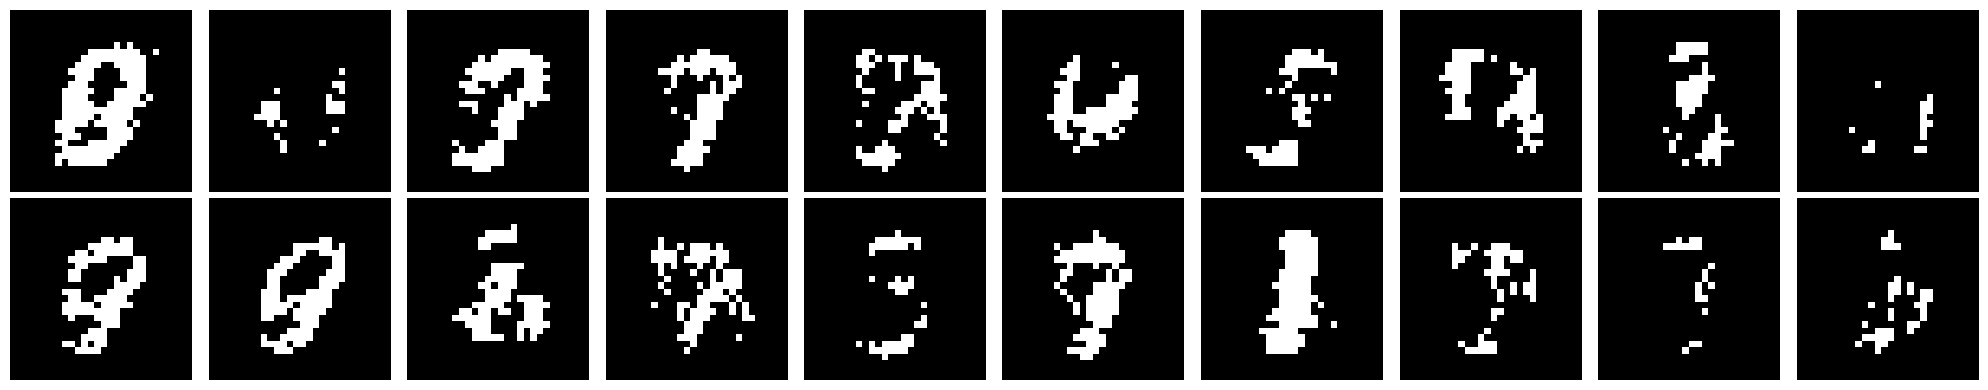

In [ ]:
_= gan_model.generate_data()

In [ ]:
gan_generated_images = gan_model.generer_image_DBN(nb_to_generate=len(X_test[:5000]), plot_=False)
gan_fid_score = compute_fid_score(X_test[:5000], gan_generated_images, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print(f"FID score with GAN: {gan_fid_score:.4f}")